In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
for col in df.columns:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

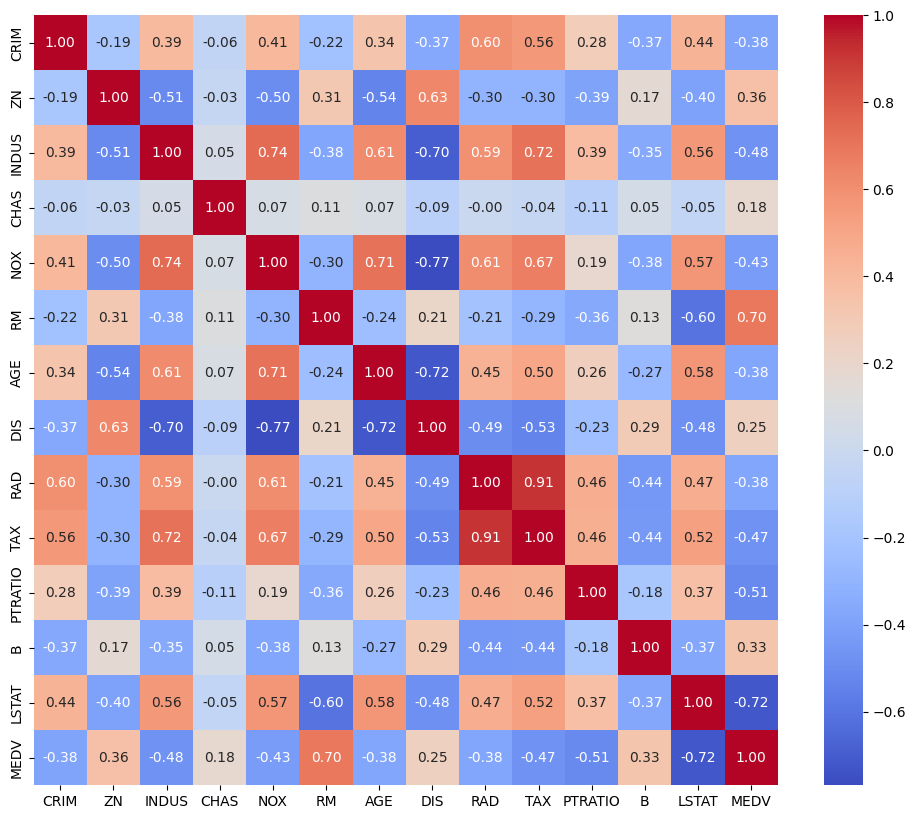

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
# df.drop(columns='TAX', inplace=True)

In [10]:
df['MEDV'] = df['MEDV'].apply(lambda x : 0 if x <= 25 else 1)

<Axes: >

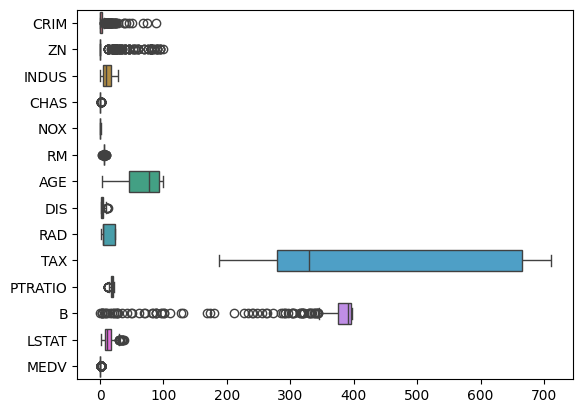

In [11]:
sns.boxplot(df, orient='h')

In [12]:
for col in df.columns:
    if col != 'MEDV':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        mean_val = df[col].mean()
        lwr = q1 - 1.5 * iqr
        upr = q3 + 1.5 * iqr
        df[col] = df[col].apply(lambda x : mean_val if x < lwr or x > upr else x)

<Axes: >

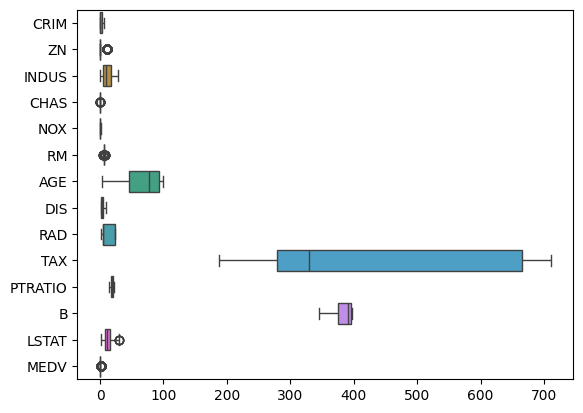

In [13]:
sns.boxplot(df, orient='h')

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['MEDV'])
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [15]:
y_train.value_counts()

MEDV
0    305
1     99
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [17]:
y_train_smote.value_counts()

MEDV
0    305
1    305
Name: count, dtype: int64

In [18]:
min_val = x_train_smote.min(axis=0)
max_val = x_train_smote.max(axis=0)
range_val = max_val - min_val
range_val[range_val == 0] = 1
x_train_scaled = (x_train_smote - min_val) / range_val
x_test_scaled = (x_test - min_val) / range_val

Dimensi 1 = 0.5124872361818358
Dimensi 2 = 0.656352158033625
Dimensi 3 = 0.7408107451677417
Dimensi 4 = 0.8037594562685507
Dimensi 5 = 0.8600766433021729
Dimensi 6 = 0.8966269777021827
Dimensi 7 = 0.926660085169568
Dimensi 8 = 0.9460875927643858
Dimensi 9 = 0.9627819821879985
Dimensi 10 = 0.9764923303133182


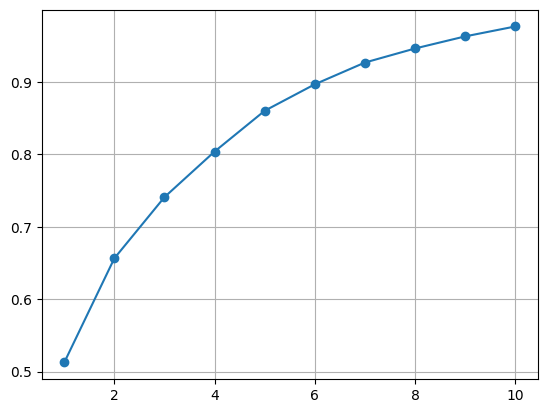

In [19]:
from sklearn.decomposition import PCA
explained_variance = []
for n in range(1, 11):
    pca = PCA(n_components=n)
    pca.fit(x_train_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    print(f'Dimensi {n} = {np.sum(pca.explained_variance_ratio_)}')

plt.plot(range(1, 11), explained_variance, marker='o')
plt.grid(True)
plt.show()

In [20]:
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [21]:
x_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.939947,0.0,0.646628,0.0,0.404564,0.456065,0.972281,0.132999,1.000000,0.914122,0.785714,0.226275,0.792139
1,0.511096,0.0,0.646628,0.0,0.645228,0.233369,1.000000,0.055700,1.000000,0.914122,0.785714,1.000000,0.774433
2,0.025795,0.0,0.253666,0.0,0.215768,0.532195,0.512793,0.421435,0.173913,0.190840,0.714286,1.000000,0.182011
3,0.511096,0.0,0.646628,1.0,0.578838,0.353967,0.889126,0.000000,1.000000,0.914122,0.785714,0.057126,0.253187
4,0.214433,0.0,0.700880,0.0,0.448133,0.928139,0.901919,0.103950,0.173913,0.412214,0.130952,0.567802,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.086329,1.0,0.128666,0.0,0.451465,0.499692,0.741317,0.125978,0.173913,0.146947,0.578040,0.805830,0.166133
606,0.014479,1.0,0.197947,0.0,0.087137,0.720117,0.007735,0.960931,0.260870,0.272901,0.654762,0.808388,0.063767
607,0.022529,1.0,0.233828,0.0,0.156022,0.492796,0.114378,0.406396,0.086957,0.066794,0.594635,0.998430,0.339445
608,0.035381,0.0,0.207467,0.0,0.239054,0.594726,0.166706,0.276331,0.260870,0.227099,0.448824,0.689107,0.073960


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

for n in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_scaled, y_train_smote)
    y_pred = knn.predict(x_test_scaled)
    accuracy = np.mean(y_test == y_pred)
    print(f'Kluster {n} = {accuracy}')

Kluster 2 = 0.9215686274509803
Kluster 3 = 0.8725490196078431
Kluster 4 = 0.9019607843137255
Kluster 5 = 0.8725490196078431
Kluster 6 = 0.8529411764705882
Kluster 7 = 0.8137254901960784
Kluster 8 = 0.8235294117647058
Kluster 9 = 0.8137254901960784
Kluster 10 = 0.8235294117647058


In [23]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,10.768775,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.000000,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43
502,0.04527,0.000000,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.000000,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.000000,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [24]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_scaled, y_train_smote)
y_pred = knn.predict(x_test_scaled)
print(np.mean(y_test == y_pred) * 100)

92.15686274509804


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        77
           1       0.95      0.72      0.82        25

    accuracy                           0.92       102
   macro avg       0.93      0.85      0.88       102
weighted avg       0.92      0.92      0.92       102

